In [82]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/personal-transactions/personal_transactions.csv")
df.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [83]:
import os

for root, dirs, files in os.walk("/kaggle/input"):
    for file in files:
        print(os.path.join(root, file))
        

/kaggle/input/personal-transactions/personal_transactions.csv


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              806 non-null    object 
 1   Description       806 non-null    object 
 2   Amount            806 non-null    float64
 3   Transaction Type  806 non-null    object 
 4   Category          806 non-null    object 
 5   Account Name      806 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.9+ KB


In [85]:
df.shape

(806, 6)

In [8]:
df.columns

Index(['Date', 'Description', 'Amount', 'Transaction Type', 'Category',
       'Account Name'],
      dtype='object')

In [9]:
df.sample(5)

,Date,Description,Amount,Transaction Type,Category,Account Name
666,06/13/2019,Credit Card Payment,152.72,credit,Credit Card Payment,Platinum Card
690,07/04/2019,Netflix,13.90,debit,Television,Platinum Card
769,09/05/2019,Starbucks,3.75,debit,Coffee Shops,Platinum Card
564,03/15/2019,Power Company,60.00,debit,Utilities,Checking
406,11/13/2018,Grocery Store,37.43,debit,Groceries,Platinum Card


In [13]:
df['Description_clean'] = df['Description'].str.lower()
df[['Description', 'Description_clean']].head()

,Description,Description_clean
0,Amazon,amazon
1,Mortgage Payment,mortgage payment
2,Thai Restaurant,thai restaurant
3,Credit Card Payment,credit card payment
4,Netflix,netflix


In [14]:
df['Category'].value_counts()

Category
Credit Card Payment       143
Groceries                 105
Restaurants                81
Utilities                  63
Shopping                   60
Gas & Fuel                 52
Paycheck                   46
Home Improvement           36
Coffee Shops               31
Alcohol & Bars             25
Internet                   21
Mortgage & Rent            21
Mobile Phone               21
Music                      21
Movies & DVDs              18
Auto Insurance             18
Fast Food                  16
Haircut                    13
Television                  8
Electronics & Software      4
Food & Dining               2
Entertainment               1
Name: count, dtype: int64

In [31]:
#Want to group similar categories together, i.e. Food & Dining, Fast Food, Coffee Shops, Restaurants, Groceries could all be one.

spending_map = {
    'Groceries': 'Food',
    'Restaurants': 'Food',
    'Fast Food': 'Food',
    'Coffee Shops': 'Food',
    'Food & Dining': 'Food',

    'Mortgage & Rent': 'Housing & Utilities',
    'Utilities': 'Housing & Utilities',
    'Internet': 'Housing & Utilities',
    'Mobile Phone': 'Housing & Utilities',

    'Gas & Fuel': 'Transportation',
    'Auto Insurance': 'Transportation',

    'Shopping': 'Shopping & Personal',
    'Home Improvement': 'Shopping & Personal',
    'Haircut': 'Shopping & Personal',
    'Electronics & Software': 'Shopping & Personal',
    'Alcohol & Bars': 'Shopping & Personal',

    'Movies & DVDs': 'Entertainment & Subscriptions',
    'Music': 'Entertainment & Subscriptions',
    'Television': 'Entertainment & Subscriptions',
    'Entertainment': 'Entertainment & Subscriptions',

    'Credit Card Payment': 'Financial',
    'Paycheck': 'Income'
}

df['Spending_Group'] = df['Category'].map(spending_map)

In [32]:
df[['Category', 'Spending_Group']].head(10)

#Have successfully consolidated many of the categories into more concise, clean ones.

,Category,Spending_Group
0,Shopping,Shopping & Personal
1,Mortgage & Rent,Housing & Utilities
2,Restaurants,Food
3,Credit Card Payment,Financial
4,Movies & DVDs,Entertainment & Subscriptions
5,Restaurants,Food
6,Home Improvement,Shopping & Personal
7,Utilities,Housing & Utilities
8,Home Improvement,Shopping & Personal
9,Music,Entertainment & Subscriptions


In [53]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')


df['Date'].dtype


dtype('<M8[ns]')

In [54]:
spending_df = df[~df['Spending_Group'].isin(['Income', 'Financial'])]
#After defining month, we use this to filter monthly spending (minus paycheck and credit card payments).

In [55]:
monthly_spending = (
    spending_df
    .groupby('Month')['Amount']
    .sum()
    .reset_index()
)
print(monthly_spending.head())

     Month    Amount
0  2018-01   2066.65
1  2018-02   2089.44
2  2018-03   2178.66
3  2018-04   2862.66
4  2018-05  10507.56


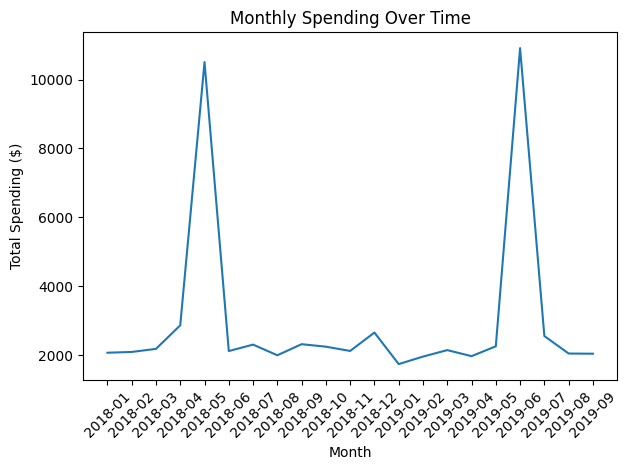

In [56]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_spending['Month'].astype(str), monthly_spending['Amount'])
plt.xticks(rotation=45)
plt.title('Monthly Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Total Spending ($)')
plt.tight_layout()
plt.show()

In [59]:
#Analyze the spikes in May 2018 and 2019.
may_2018 = spending_df[spending_df['Month'] == '2018-05']
may_2018_breakdown = (
    may_2018.groupby('Spending_Group')['Amount']
    .sum()
    .sort_values(ascending=False)
)
may_2018_breakdown



Spending_Group
Shopping & Personal              8298.59
Housing & Utilities              1558.61
Food                              444.30
Transportation                    147.74
Entertainment & Subscriptions      58.32
Name: Amount, dtype: float64

In [60]:
may_2019 = spending_df[spending_df['Month'] == '2019-05']
may_2019_breakdown = (
    may_2019.groupby('Spending_Group')['Amount']
    .sum()
    .sort_values(ascending=False)
)
may_2019_breakdown

Spending_Group
Housing & Utilities              1365.00
Shopping & Personal               483.82
Food                              233.00
Transportation                    147.00
Entertainment & Subscriptions      24.59
Name: Amount, dtype: float64

In [61]:
june_2019 = spending_df[spending_df['Month'] == '2019-06']
june_2019_breakdown = (
    june_2019.groupby('Spending_Group')['Amount']
    .sum()
    .sort_values(ascending=False)
)
june_2019_breakdown

Spending_Group
Shopping & Personal              9273.09
Housing & Utilities              1365.00
Transportation                    180.63
Food                               69.07
Entertainment & Subscriptions      24.59
Name: Amount, dtype: float64

In [63]:
comparison = pd.DataFrame({
    '2018-05': may_2018_breakdown,
    '2019-05': may_2019_breakdown,
    '2019-06': june_2019_breakdown
}).fillna(0)

comparison.sort_values('2019-05', ascending=False)

,2018-05,2019-05,2019-06
Spending_Group,,,
Housing & Utilities,1558.61,1365.00,1365.00
Shopping & Personal,8298.59,483.82,9273.09
Food,444.30,233.00,69.07
Transportation,147.74,147.00,180.63
Entertainment & Subscriptions,58.32,24.59,24.59


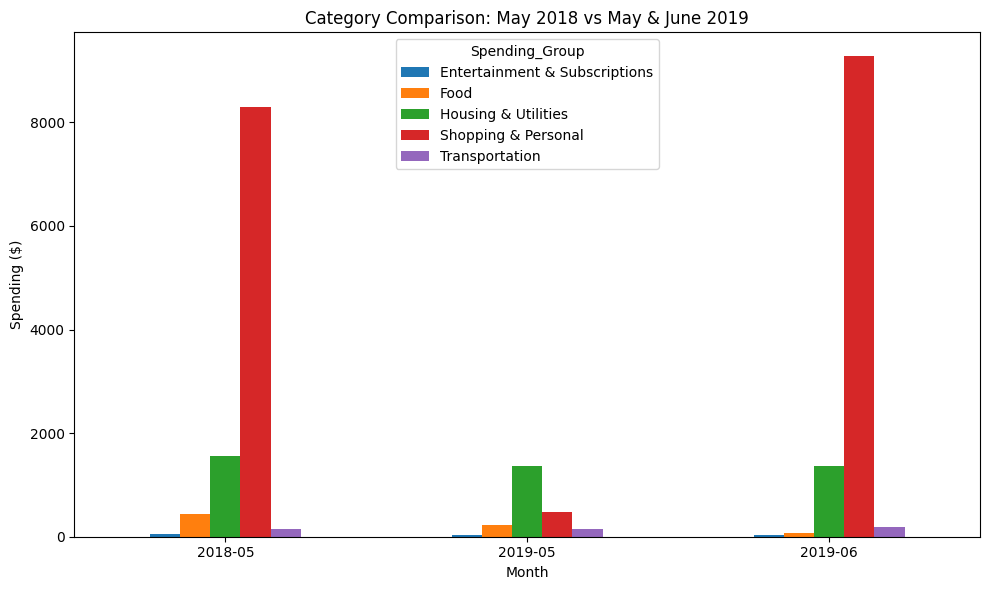

In [65]:
#Creating a Comparison Chart
comparison.loc[:, ['2018-05', '2019-05', '2019-06']]
comparison.T.plot(kind='bar', figsize=(10,6))
plt.title("Category Comparison: May 2018 vs May & June 2019")
plt.xlabel("Month")
plt.ylabel("Spending ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [66]:
comparison.sort_values('2019-06', ascending=False).head()
#Seeing explicit values of the categories that contribute to the spike.

,2018-05,2019-05,2019-06
Spending_Group,,,
Shopping & Personal,8298.59,483.82,9273.09
Housing & Utilities,1558.61,1365.00,1365.00
Transportation,147.74,147.00,180.63
Food,444.30,233.00,69.07
Entertainment & Subscriptions,58.32,24.59,24.59


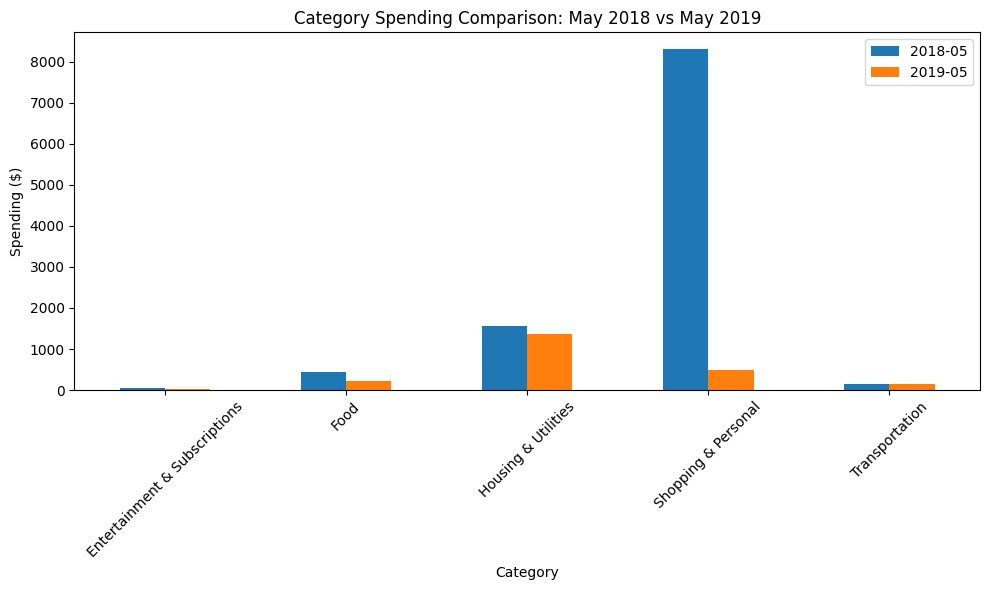

In [79]:
#First want to compare May 2018 to May 2019.
comparison['YoY May % Change'] = (
    (comparison['2019-05'] - comparison['2018-05']) 
    / comparison['2018-05']
) * 100

comparison[['2018-05', '2019-05']].plot(
    kind='bar',
    figsize=(10,6)
)

plt.title('Category Spending Comparison: May 2018 vs May 2019')
plt.xlabel('Category')
plt.ylabel('Spending ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


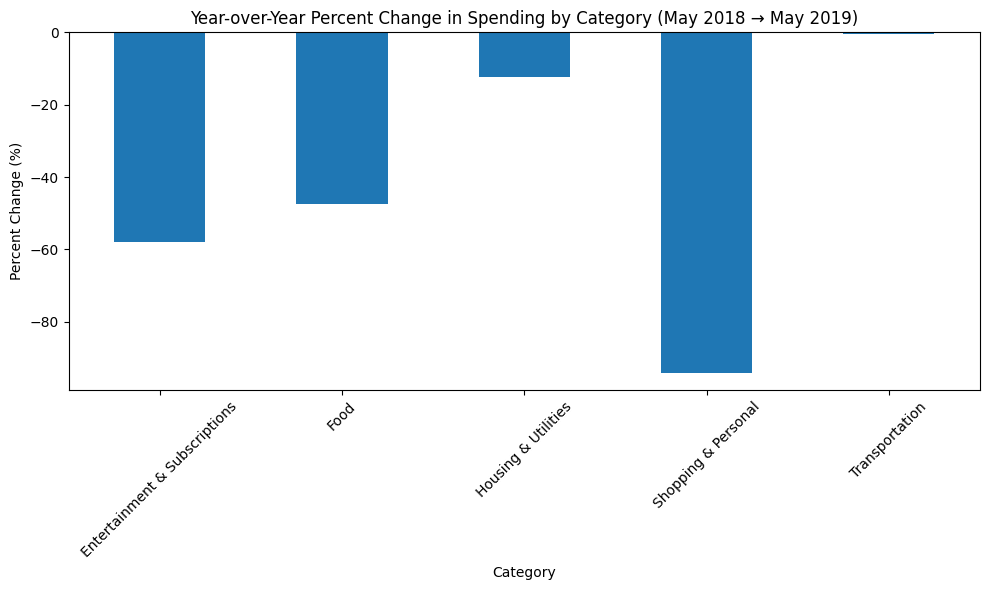

In [80]:
comparison['YoY May % Change'].plot(
    kind='bar',
    figsize=(10,6)
)

plt.title('Year-over-Year Percent Change in Spending by Category (May 2018 → May 2019)')
plt.xlabel('Category')
plt.ylabel('Percent Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
#Now compare May 2018 to June 2019; the two biggest spending spikes over 2 years.
comparison['2018-to-2019_June % Change'] = (
    (comparison['2019-06'] - comparison['2018-05']) 
    / comparison['2018-05']
) * 100



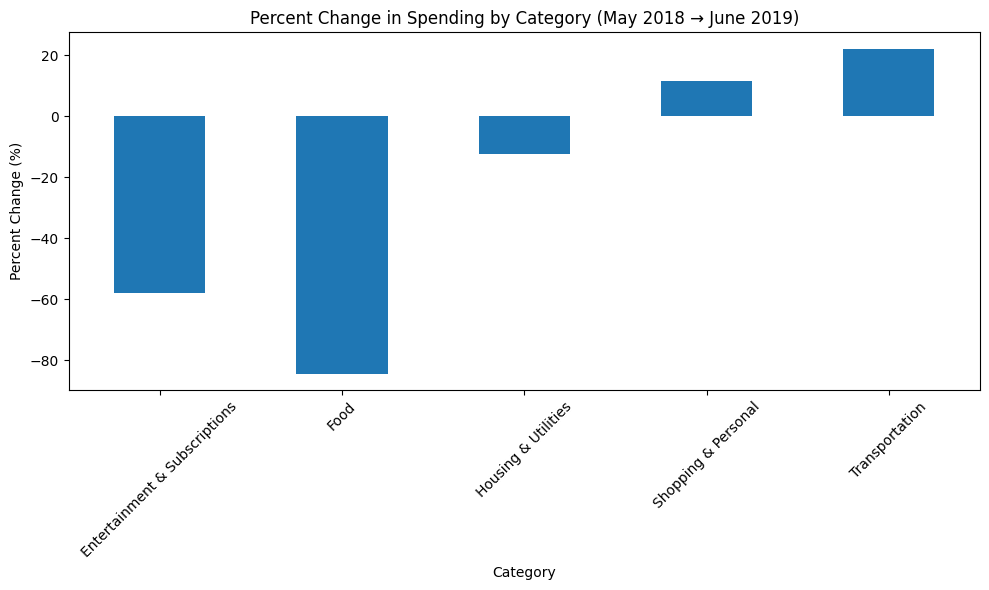

In [77]:
comparison['2018-to-2019_June % Change'].plot(
    kind='bar',
    figsize=(10,6)
)

plt.title('Percent Change in Spending by Category (May 2018 → June 2019)')
plt.xlabel('Category')
plt.ylabel('Percent Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Spending shows a seasonal increase in late spring/early summer.

- June 2019 exceeds both May spike months.

- Shopping & Personal is the largest driver of spike months.

- Housing & Utilities is comparatively stable across months.

- Food spending rises modestly during spike periods.